In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import PIL
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
import tensorflow as tf
import pathlib

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
data_dir = '/content/data' 

In [6]:
batch_size = 16
img_height = 256
img_width = 256
epochs=10

In [7]:
X_train = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

X_test = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
#The buffer_size in Dataset.shuffle() can affect the randomness of your dataset, and hence the order in which elements are produced.
#The buffer_size in Dataset.prefetch() only affects the time it takes to produce the next element.
X_train = X_train.cache().repeat().shuffle(16).prefetch(buffer_size=AUTOTUNE)
X_test = X_test.cache().repeat().prefetch(buffer_size=AUTOTUNE)

Model loaded.
Model compiled.
Epoch 1/10
10/10 [==============================] - 49s 5s/step - loss: 1.1431 - accuracy: 0.6035 - val_loss: 0.6098 - val_accuracy: 0.7125
Epoch 2/10
10/10 [==============================] - 46s 5s/step - loss: 0.6132 - accuracy: 0.7781 - val_loss: 0.6263 - val_accuracy: 0.7750
Epoch 3/10
10/10 [==============================] - 47s 5s/step - loss: 0.5251 - accuracy: 0.7326 - val_loss: 0.4342 - val_accuracy: 0.7250
Epoch 4/10
10/10 [==============================] - 47s 5s/step - loss: 0.3700 - accuracy: 0.7783 - val_loss: 0.3133 - val_accuracy: 0.7125
Epoch 5/10
10/10 [==============================] - 47s 5s/step - loss: 0.3417 - accuracy: 0.7434 - val_loss: 0.2920 - val_accuracy: 0.7250
Epoch 6/10
10/10 [==============================] - 48s 5s/step - loss: 0.3396 - accuracy: 0.7213 - val_loss: 0.3084 - val_accuracy: 0.7500
Epoch 7/10
10/10 [==============================] - 47s 5s/step - loss: 0.2873 - accuracy: 0.7925 - val_loss: 0.2569 - val_accurac

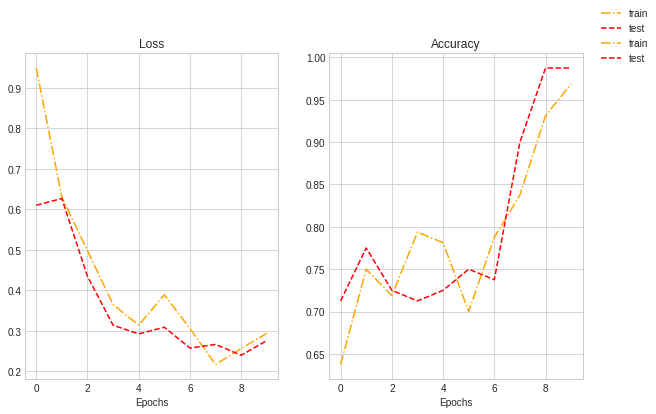

In [10]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid', name='visualized_layer')
])
print('Model loaded.')

model.compile(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
print('Model compiled.')

history = model.fit(
            X_train,
            steps_per_epoch=10,
            epochs=epochs,
            validation_data=X_test,
            validation_steps=5)
print('Model fitted.')

print(model.summary())

model.save('colab_model.h5')

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(history.history['loss'], label='train', linestyle='-.', color='orange')
ax[0].plot(history.history['val_loss'], label='test', linestyle='--', color='red')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[1].plot(history.history['accuracy'], label='train', linestyle='-.', color='orange')
ax[1].plot(history.history['val_accuracy'], label='test',linestyle='--', color='red')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epochs')
fig.legend()
fig.savefig('model_loss_acc_colab.jpeg')


In [ ]:
# From this point on, code does not work and further research is required *

In [22]:
from vis.visualization import visualize_activation
from vis.utils import utils
import matplotlib.pyplot as plt

ImportError: ignored

In [41]:
model = load_model('colab_model.h5')
print('Model loaded.')

# get index of visualized layer
layer_index = utils.find_layer_idx(model, 'visualized_layer')

# Swap sigmoid with linear
#model.layers[layer_index].activation = activations.linear
#model = utils.apply_modifications(model)  

# only two classes: fire or not fire
classes_to_visualize = [0, 1]
classes = {
  0: 'Fire',
  1: 'Not Fire'
}

# Visualize
for number_to_visualize in classes_to_visualize:
  visualization = visualize_activation(model, layer_index, filter_indices=number_to_visualize, input_range=(0., 1.))
  plt.imshow(visualization)
  plt.title('Target = {}'.format(classes[number_to_visualize]))
  plt.show()

opt = Optimizer(model.input, losses)
opt.minimize(max_iter=500, verbose=True, input_modifiers=[Jitter()], callbacks=[GifGenerator('opt_progress')])

Model loaded.


NameError: ignored

In [46]:
from sklearn.metrics import roc_curve

model = load_model('colab_model.h5')

X_test2 = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=16)
'''
print(model.evaluate(X_test2))

y = np.concatenate([y for x, y in X_test2], axis=0)
predictions = model.predict(X_test2, verbose=2)
y_pred = predictions.ravel()
y_pred = y_pred > 0.5
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y, y_pred)
'''

Found 999 files belonging to 2 classes.
Using 199 files for validation.


'\nprint(model.evaluate(X_test2))\n\ny = np.concatenate([y for x, y in X_test2], axis=0)\npredictions = model.predict(X_test2, verbose=2)\ny_pred = predictions.ravel()\ny_pred = y_pred > 0.5\nfpr_keras, tpr_keras, thresholds_keras = roc_curve(y, y_pred)\n'

In [43]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

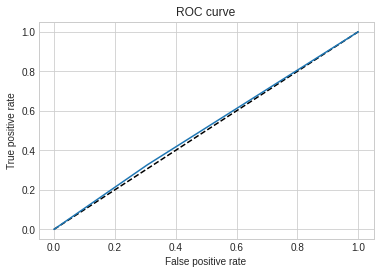

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.savefig('roccurve.jpeg')

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[104,  46],
       [ 33,  16]])